In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

class_dist=df['Outcome'].value_counts()
print(class_dist)
print('\nClass 0: {:0.2f}%'.format(100 *class_dist[0] / (class_dist[0]+class_dist[1])))
print('Class 1: {:0.2f}%'.format(100 *class_dist[1] / (class_dist[0]+class_dist[1])))

0    500
1    268
Name: Outcome, dtype: int64

Class 0: 65.10%
Class 1: 34.90%


([<matplotlib.axis.XTick at 0x250d7a45070>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

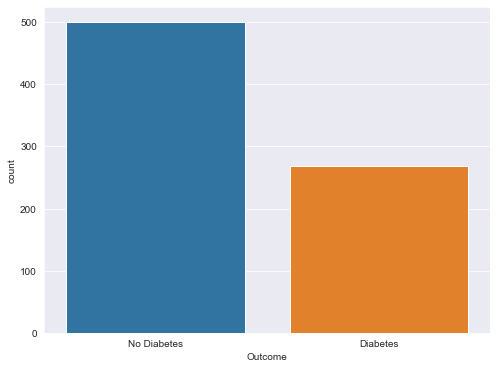

In [4]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Outcome', data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

In [5]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome'].values

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

Recall Score  0.5679012345679012
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

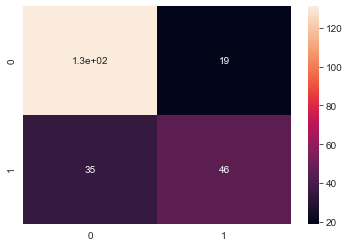

In [6]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [7]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After UnderSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before UnderSampling, counts of label '1': 187
Before UnderSampling, counts of label '0': 350 

After UnderSampling, the shape of train_X: (374, 8)
After UnderSampling, the shape of train_y: (374,) 

After UnderSampling, counts of label '1': 187
After UnderSampling, counts of label '0': 187


([<matplotlib.axis.XTick at 0x250d9c62c40>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

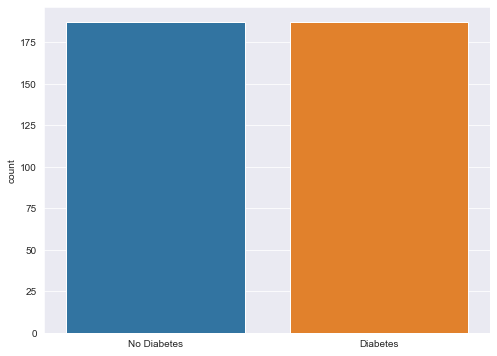

In [8]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

Recall Score  0.7901234567901234
              precision    recall  f1-score   support

           0       0.86      0.72      0.79       150
           1       0.60      0.79      0.68        81

    accuracy                           0.74       231
   macro avg       0.73      0.76      0.73       231
weighted avg       0.77      0.74      0.75       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

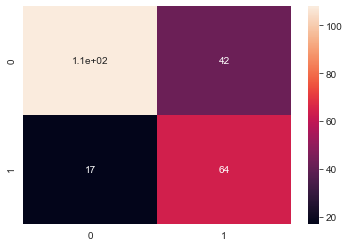

In [9]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [10]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomOverSampler()
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 350 

After OverSampling, the shape of train_X: (700, 8)
After OverSampling, the shape of train_y: (700,) 

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 350


([<matplotlib.axis.XTick at 0x250d9d3fb80>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

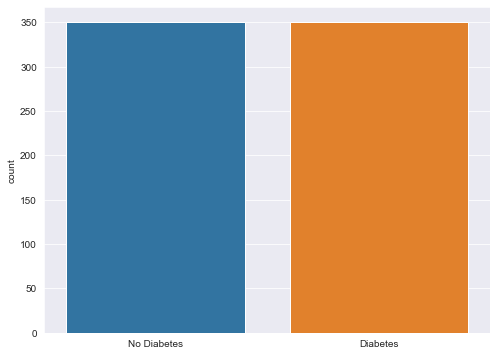

In [11]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

Recall Score  0.7160493827160493
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.62      0.72      0.67        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

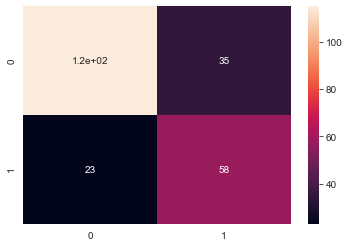

In [12]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
from imblearn.over_sampling import SMOTE
sm = SMOTE() 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 350 

After OverSampling, the shape of train_X: (700, 8)
After OverSampling, the shape of train_y: (700,) 

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 350


([<matplotlib.axis.XTick at 0x250dadd5250>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

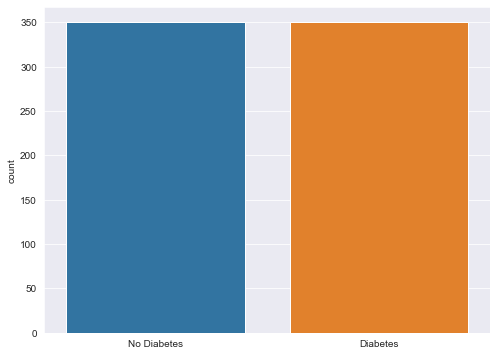

In [14]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

Recall Score  0.7777777777777778
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       150
           1       0.59      0.78      0.67        81

    accuracy                           0.73       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.73      0.74       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

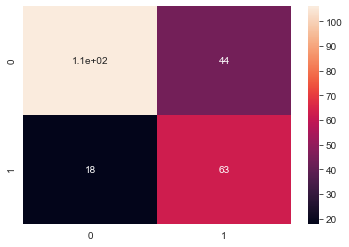

In [15]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 


# trying BorderLineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 350 

After OverSampling, the shape of train_X: (700, 8)
After OverSampling, the shape of train_y: (700,) 

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 350


([<matplotlib.axis.XTick at 0x250daeba970>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

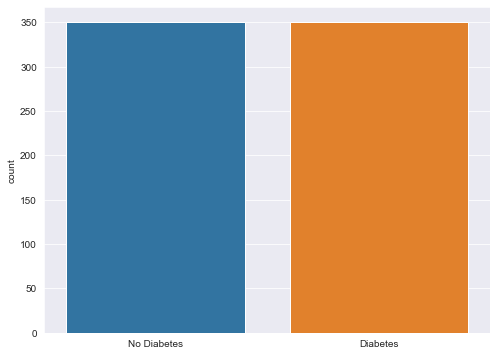

In [17]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

Recall Score  0.7654320987654321
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       150
           1       0.60      0.77      0.67        81

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.76      0.74      0.74       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

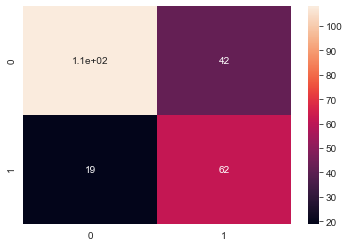

In [18]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# trying ADASYN
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 350 

After OverSampling, the shape of train_X: (683, 8)
After OverSampling, the shape of train_y: (683,) 

After OverSampling, counts of label '1': 333
After OverSampling, counts of label '0': 350


([<matplotlib.axis.XTick at 0x250daf92520>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

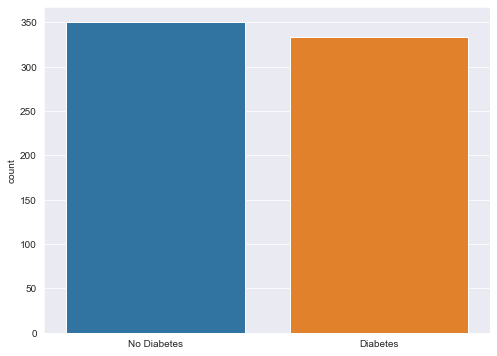

In [20]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

Recall Score  0.7777777777777778
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       150
           1       0.58      0.78      0.67        81

    accuracy                           0.73       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.73      0.73       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

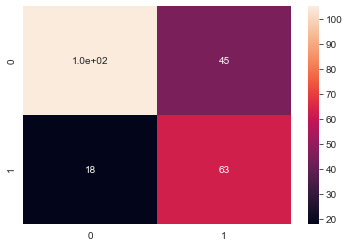

In [21]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [22]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# trying BorderLineSVM
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 350 

After OverSampling, the shape of train_X: (700, 8)
After OverSampling, the shape of train_y: (700,) 

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 350


([<matplotlib.axis.XTick at 0x250db07d610>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

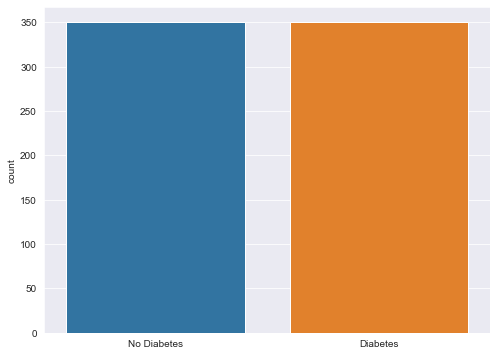

In [23]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

Recall Score  0.8024691358024691
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       150
           1       0.56      0.80      0.66        81

    accuracy                           0.71       231
   macro avg       0.71      0.73      0.70       231
weighted avg       0.76      0.71      0.72       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

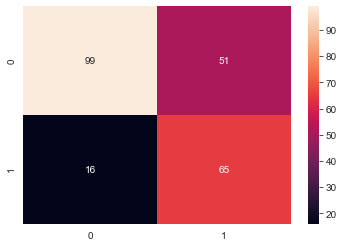

In [24]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [25]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 350 

After OverSampling, the shape of train_X: (681, 8)
After OverSampling, the shape of train_y: (681,) 

After OverSampling, counts of label '1': 350
After OverSampling, counts of label '0': 331


([<matplotlib.axis.XTick at 0x250db165910>,
 [Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')])

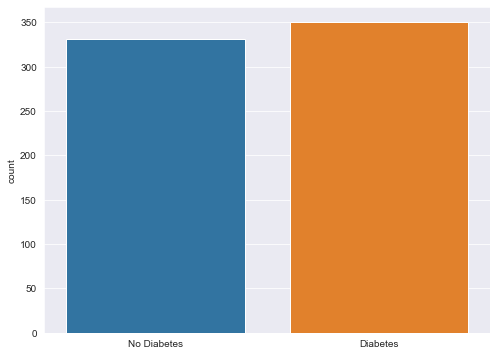

In [26]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Diabetes', 'Diabetes')
plt.xticks(range(2), Labels)

Recall Score  0.7901234567901234
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       150
           1       0.59      0.79      0.68        81

    accuracy                           0.74       231
   macro avg       0.73      0.75      0.73       231
weighted avg       0.77      0.74      0.74       231



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

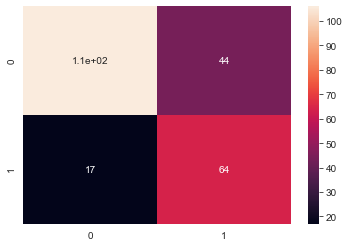

In [27]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')